In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [2]:
%cd 'drive/MyDrive/Colab Notebooks/Curso practico machine learning'

/content/drive/MyDrive/Colab Notebooks/Curso practico machine learning


In [3]:
diabetes = pd.read_csv('diabetes.csv')
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
diabetes.shape

(768, 9)

In [5]:
feature_cols = ['Pregnancies', 'Insulin', 'BMI', 'Age', 'Glucose', 'BloodPressure', 'DiabetesPedigreeFunction']
x = diabetes[feature_cols]
y = diabetes.Outcome

In [6]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.25, random_state=0)

In [7]:
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, Y_train)
y_pred = logreg.predict(X_test)

In [8]:
y_pred

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0])

En este caso el array de X_test o datos de prueba nos muestra la clasificacion ed los pacientes utilizando 1 para quienes tiene diabetes, y 2 para quienes no tienen.

In [9]:
cnf_matrix = metrics.confusion_matrix(Y_test, y_pred)
cnf_matrix

array([[118,  12],
       [ 26,  36]])

Text(0.5, 257.44, 'Etiqueta de prediccion')

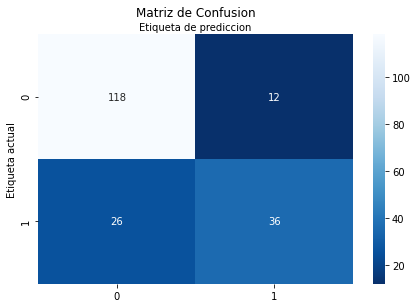

In [10]:
import numpy as np
class_names = [0, 1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap='Blues_r', fmt='g')

# plot custom properties
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Matriz de Confusion', y=1.1)
plt.ylabel('Etiqueta actual')
plt.xlabel('Etiqueta de prediccion')

La interpretacion  las metricas se dan de la siguiete manera, leyendo la matriz siempre en diagonal

<img src='https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fi0.wp.com%2Fwww.aprendemachinelearning.com%2Fwp-content%2Fuploads%2F2019%2F05%2Fconfusion_matix_example.png&f=1&nofb=1' height=500>

**Accuracy** contesta la pregunta:

¿Cuántos pacientes etiquetamos correctamente (positivos y negativos) de todos los pacientes?

In [11]:
# Calculo de Exactitud o Accuracy
print("Exactitud", metrics.accuracy_score(Y_test, y_pred))

Exactitud 0.8020833333333334


**Precision** responde lo siguiente:

¿Cuántos de los que etiquetamos como diabéticos son realmente diabéticos?

In [12]:
# Calculo de Precision o precision
print("Precision", metrics.precision_score(Y_test, y_pred))

Precision 0.75


**Recall (a.k.a Sensitivity)** responde a la siguiente pregunta: 

De todas las personas que son diabéticas, ¿cuántas de ellas predecimos correctamente?

In [13]:
# Calculo de Recall
print("Recall", metrics.recall_score(Y_test, y_pred))

Recall 0.5806451612903226


Forma 2 de plotear el heatmap

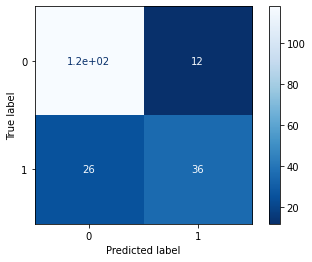

In [14]:
disp = metrics.ConfusionMatrixDisplay(cnf_matrix, display_labels=logreg.classes_)
disp.plot(cmap='Blues_r',)

In [16]:
len(Y_test)

192

In [17]:
len(y_pred)

192